In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

%matplotlib inline

In [32]:
# đọc dữ liệu
data = pd.read_csv('https://raw.githubusercontent.com/Levytan/mis_hutech/refs/heads/master/B%C3%A0i%20t%E1%BA%ADp/L%E1%BA%ADp%20tr%C3%ACnh%20n%C3%A2ng%20cao/msft.csv')

In [33]:
data.head()

,date,close
0,2014-10-20,37.689240
1,2014-10-21,38.373245
2,2014-10-22,37.945736
3,2014-10-23,38.492947
4,2014-10-24,39.442032


In [34]:
data.dtypes

date      object
close    float64
dtype: object

In [35]:
# chuyển kiểu dữ liệu
data = data.assign(
    date = pd.to_datetime(data.date)
)

In [36]:
data.dtypes

date     datetime64[ns]
close           float64
dtype: object

In [8]:
data = data[data.date > '2024-01-01']

In [37]:
# tính sma10 và sma20
data = data.assign(
    sma10 = data.close.rolling(10).mean(),
    sma20 = data.close.rolling(20).mean()
)
data.tail()

,date,close,sma10,sma20
2512,2024-10-14,419.140015,416.343002,424.388499
2513,2024-10-15,418.739990,416.148001,423.567999
2514,2024-10-16,416.119995,416.047000,422.833499
2515,2024-10-17,416.720001,416.064999,421.734999
2516,2024-10-18,418.160004,416.275000,420.879500


In [38]:
# tính ema
def calculate_ema(close: pd.Series, n: int):
    # tính sma
    ema = close.rolling(n).mean()
    ema[n:] = close[n:]
    ema[n-1:] = ema[n-1:].ewm(span = n, adjust = False).mean()
    return ema

In [39]:
data = data.assign(
    ema12 = calculate_ema(data.close, 12),
    ema26 = calculate_ema(data.close, 26)
)

In [40]:
data.tail()

,date,close,sma10,sma20,ema12,ema26
2512,2024-10-14,419.140015,416.343002,424.388499,418.837624,420.624055
2513,2024-10-15,418.739990,416.148001,423.567999,418.822603,420.484495
2514,2024-10-16,416.119995,416.047000,422.833499,418.406817,420.161199
2515,2024-10-17,416.720001,416.064999,421.734999,418.147307,419.906295
2516,2024-10-18,418.160004,416.275000,420.879500,418.149260,419.776940


In [41]:
# tính macd
data = data.assign(
    macd = data.ema12 - data.ema26
)

In [42]:
data = data.drop(columns = ['ema12', 'ema26'])

In [43]:
data.tail()

,date,close,sma10,sma20,macd
2512,2024-10-14,419.140015,416.343002,424.388499,-1.786432
2513,2024-10-15,418.739990,416.148001,423.567999,-1.661892
2514,2024-10-16,416.119995,416.047000,422.833499,-1.754382
2515,2024-10-17,416.720001,416.064999,421.734999,-1.758988
2516,2024-10-18,418.160004,416.275000,420.879500,-1.627680


In [44]:
sig = pd.Series(float('nan'), index = data.index)
sig[pd.notna(data.macd)] = calculate_ema(data[pd.notna(data.macd)].macd, 9)

In [45]:
data = data.assign(sig = sig)

In [46]:
# tính rsi
diff = data.close.diff()
u = diff.where(diff > 0, 0)
d = -diff.where(diff < 0, 0)

In [47]:
u = u.rolling(14).mean()
d = d.rolling(14).mean()

In [48]:
data = data.assign(
    rsi = 100 * u / (u + d)
)

In [49]:
data.tail()

,date,close,sma10,sma20,macd,sig,rsi
2512,2024-10-14,419.140015,416.343002,424.388499,-1.786432,-0.760140,38.312733
2513,2024-10-15,418.739990,416.148001,423.567999,-1.661892,-0.940490,33.440678
2514,2024-10-16,416.119995,416.047000,422.833499,-1.754382,-1.103269,31.998102
2515,2024-10-17,416.720001,416.064999,421.734999,-1.758988,-1.234412,35.696218
2516,2024-10-18,418.160004,416.275000,420.879500,-1.627680,-1.313066,34.299039


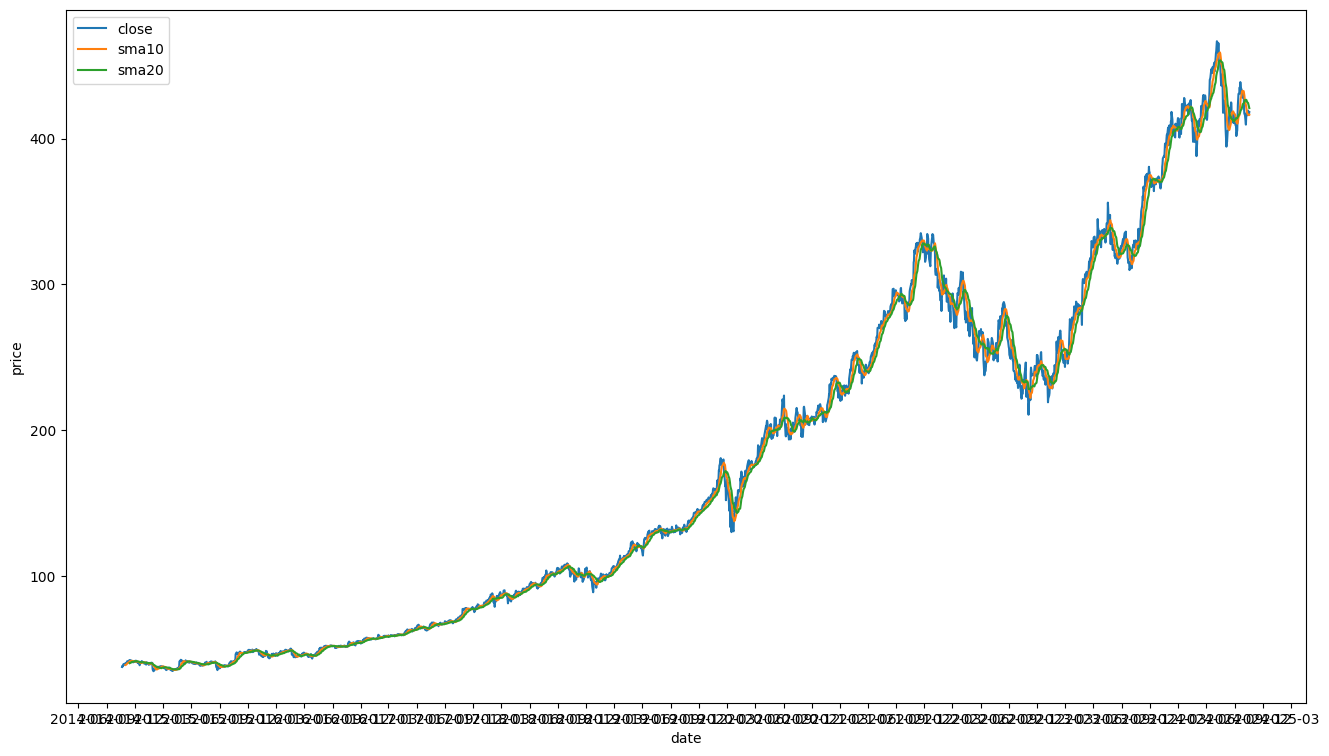

In [50]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(1, 1, 1)

#vẽ chart
sns.lineplot(data = data, x = 'date', y = 'close', ax = ax, label = 'close')
sns.lineplot(data = data, x = 'date', y = 'sma10', ax = ax, label = 'sma10')
sns.lineplot(data = data, x = 'date', y = 'sma20', ax = ax, label = 'sma20')

ax.set_ylabel("price")
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = [3, 6, 9, 12]))

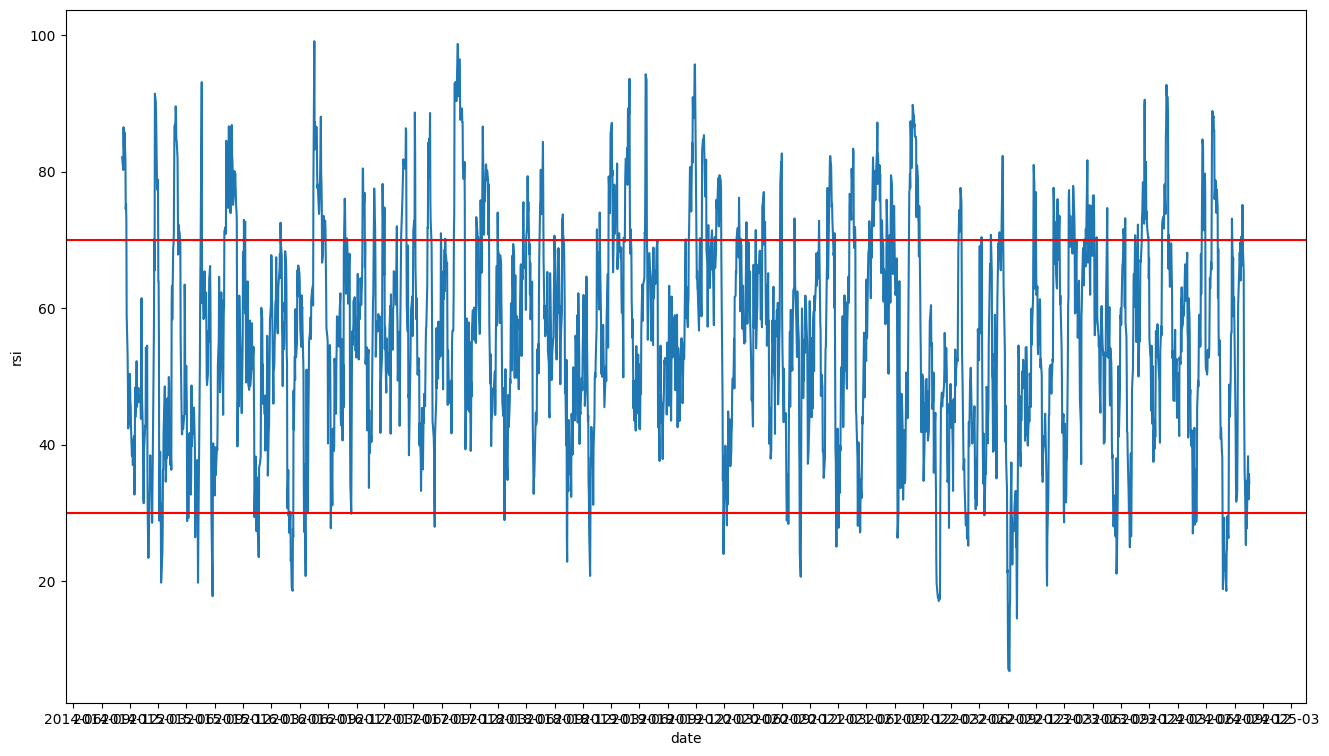

In [51]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(1, 1, 1)

#vẽ chart
#sns.lineplot(data = data, x = 'date', y = 'ema9', ax = ax)
sns.lineplot(data = data, x = 'date', y = 'rsi', ax = ax)

ax.set_ylabel("rsi")
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = [3, 6, 9, 12]))

ax.axhline(30, color='red', linestyle='-')
ax.axhline(70, color='red', linestyle='-')

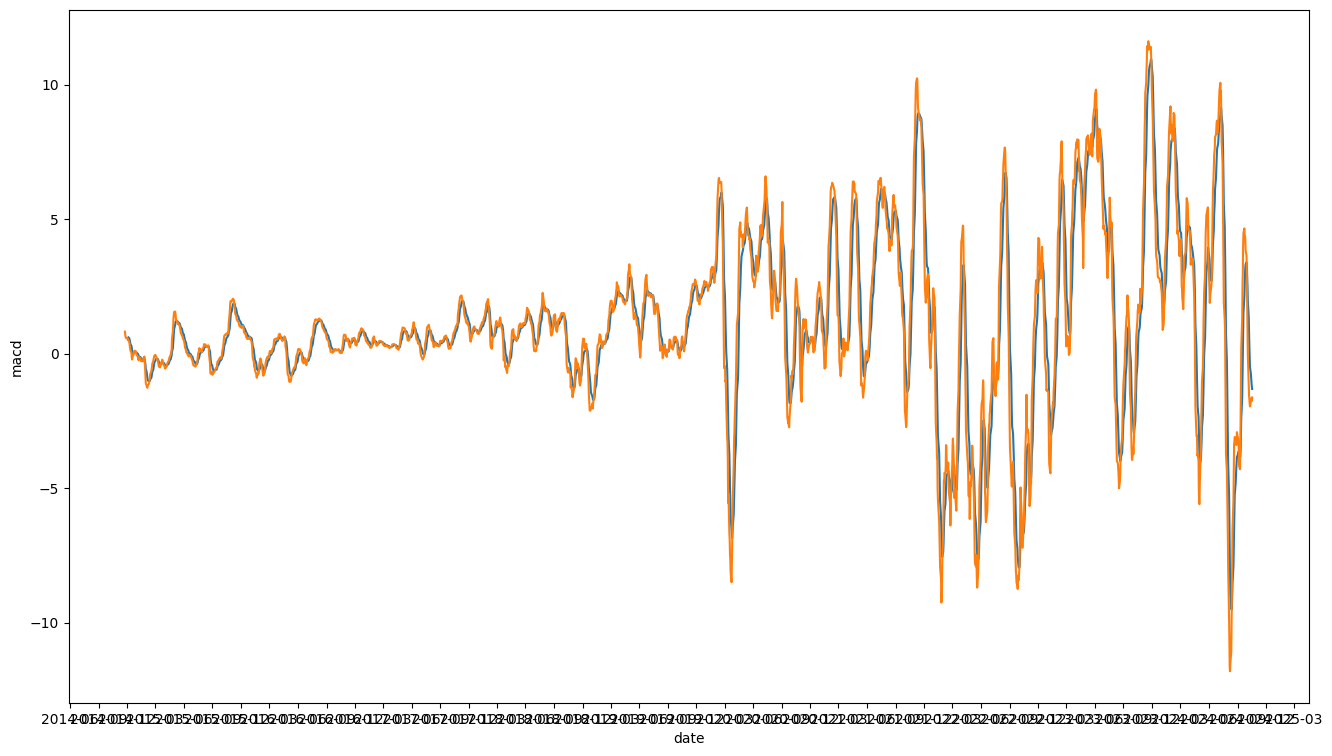

In [52]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(1, 1, 1)

#vẽ chart
sns.lineplot(data = data, x = 'date', y = 'sig', ax = ax)
sns.lineplot(data = data, x = 'date', y = 'macd', ax = ax)

ax.set_ylabel("macd")
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = [3, 6, 9, 12]))

In [149]:
d = pd.DataFrame({'close': [10, 11, 11.5, 10.75, 12, 11.75, 12.25]})

In [28]:
data.head()

,date,close,sma10,sma20,macd,sig,rsi
2315,2024-01-02,368.854095,NaN,NaN,NaN,0.0,NaN
2316,2024-01-03,368.585571,NaN,NaN,NaN,0.0,NaN
2317,2024-01-04,365.940002,NaN,NaN,NaN,0.0,NaN
2318,2024-01-05,365.751038,NaN,NaN,NaN,0.0,NaN
2319,2024-01-08,372.653351,NaN,NaN,NaN,0.0,NaN


In [151]:
d

,close,sma,ewm,ema
0,10.00,NaN,10.000000,NaN
1,11.00,NaN,10.333333,NaN
2,11.50,NaN,10.722222,NaN
3,10.75,NaN,10.731481,NaN
4,12.00,11.05,11.154321,11.050000
5,11.75,11.40,11.352881,11.283333
6,12.25,11.65,11.651920,11.605556
